In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
from libra_toolbox.tritium.model import (
    quantity_to_activity,
    activity_to_quantity,
)
from libra_toolbox.tritium.plotting import (
    ureg,
    plot_bars,
    plot_integrated_top_release,
    plot_integrated_wall_release,
    plot_irradiation,
    plot_sample_activity_top,
    plot_sample_activity_wall,
    plot_salt_inventory,
    plot_top_release,
    plot_wall_release,
)

ureg.mpl_formatter = "{:~P}"
# remove top and right axes by default
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
# set axis below true by default
plt.rcParams["axes.axisbelow"] = True

from baby_1l_run_1 import *

In [2]:
baby_model.run(8 * ureg.day)


/home/remidm/miniconda3/envs/libra-calculations/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


In [3]:
print(f"Transport:")
print(f"  mass transport coeff top: {baby_model.k_top:.2e~P}")
print(f"  mass transport coeff wall: {baby_model.k_wall:.2e~P}")

print("Source:")
print(f"  TBR: {baby_model.TBR:.2e~P}")
print(f"  neutron rate: {baby_model.neutron_rate:.2e~P}")
print(f"  neutron rate * TBR: {baby_model.neutron_rate * baby_model.TBR:.2e~P}")
print(f"  k_top/k_wall: {baby_model.k_top/baby_model.k_wall:.2f~P}")

print("Geometry:")
print(f"  volume: {baby_model.volume.to(ureg.cm**3):.2f~P}")
print(f"  top area: {baby_model.A_top.to(ureg.cm**2):.2f~P}")
print(f"  wall area: {baby_model.A_wall.to(ureg.cm**2):.2f~P}")

Transport:
  mass transport coeff top: 1.03×10⁻⁶ m/s
  mass transport coeff wall: 3.09×10⁻⁸ m/s
Source:
  TBR: 2.50×10⁻³ particle/n
  neutron rate: 1.06×10⁸ n/s
  neutron rate * TBR: 2.66×10⁵ particle/s
  k_top/k_wall: 33.33
Geometry:
  volume: 1000.00 cm³
  top area: 153.94 cm²
  wall area: 445.87 cm²


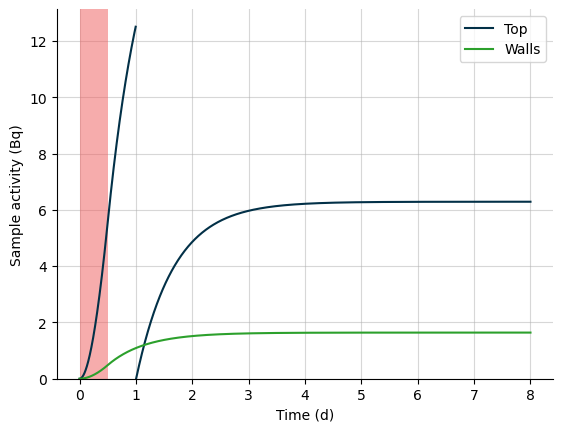

In [4]:
plot_sample_activity_top(baby_model, replacement_times=replacement_times_top, color="#023047", label="Top")
plot_sample_activity_wall(baby_model, replacement_times=replacement_times_walls, color="tab:green", label="Walls")
plot_irradiation(baby_model, facecolor="#EF5B5B", alpha=0.5)
plt.ylim(bottom=0 * ureg.Bq)

plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
plt.legend()
plt.grid(alpha=0.5)

## Assuming the mass transport rates are slower than 100 mL

/home/remidm/miniconda3/envs/libra-calculations/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(fun(t, y), dtype=dtype)


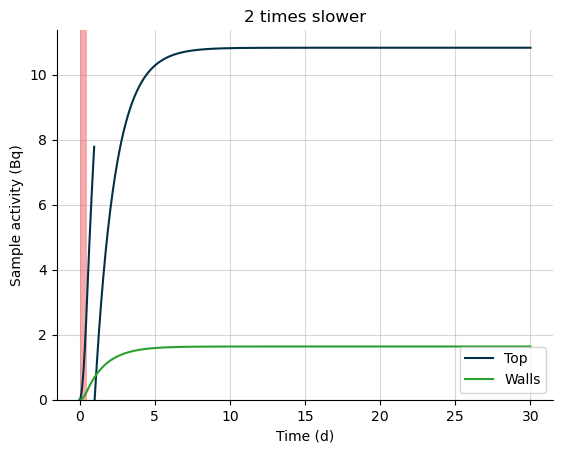

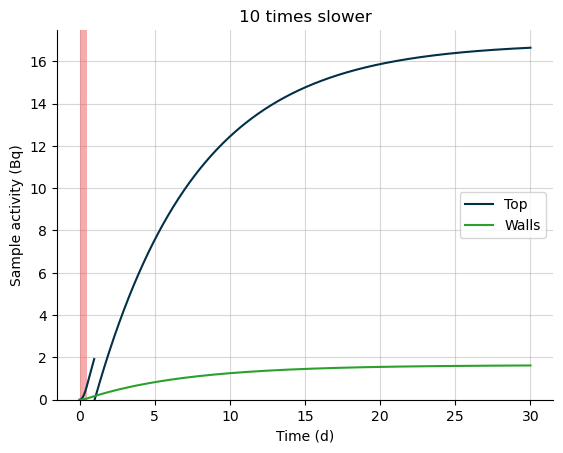

In [16]:
for factor in [0.5, 0.1]:

    new_model = Model(
        radius=baby_model.radius,
        height=baby_model.height,
        TBR=baby_model.TBR,
    )
    new_model.k_top = baby_model.k_top * factor
    new_model.k_wall = baby_model.k_wall * factor
    new_model.irradiations = baby_model.irradiations

    new_model.neutron_rate = baby_model.neutron_rate

    new_model.run(30 * ureg.day)

    plt.figure()
    plt.title(f"{1/factor:.0f} times slower")
    plot_sample_activity_top(new_model, replacement_times=replacement_times_top, color="#023047", label="Top")
    plot_sample_activity_wall(new_model, replacement_times=replacement_times_walls, color="tab:green", label="Walls")
    plot_irradiation(new_model, facecolor="#EF5B5B", alpha=0.5)
    plt.ylim(bottom=0 * ureg.Bq)

    plt.ylabel(f"Sample activity ({plt.gca().yaxis.get_units():~P})")
    plt.xlabel(f"Time ({plt.gca().xaxis.get_units():~P})")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()